In [3]:
import piplite 
await piplite.install('plotly')
#nbformat>=4.2.0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
pio.renderers.default = "plotly_mimetype+notebook"

In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected = True)

In [6]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')

In [7]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [8]:
raw_df.shape

(12032, 12)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 611.1+ KB


In [10]:
# checking redundant rows

raw_df['Location'].value_counts()

Porur                                  418
Velachery                              372
Ambattur                               334
T. Nagar                               315
Perungudi                              288
                                      ... 
Keys Hotel, Thiruvanmiyur                1
Jade Resorts, East Coast Road (ECR)      1
Novotel Chennai, OMR                     1
Hotel Blue Diamond, Kilpauk              1
Chandra Metro Mall, Virugambakkam        1
Name: Location, Length: 268, dtype: int64

In [11]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [12]:
# Dropping columns which are not required for further analysis
raw_df.drop(['Zomato URL', 'Address'], axis = 1, inplace=True)

In [13]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# Converting the DataTypes of numerical columns to numeric dataype

In [14]:
# replacing text values with 0.0 for Dining Rating column
raw_df['Dining Rating'].replace(to_replace=['None'], value='0.0', inplace=True)

In [15]:
# replacing text values with 0 for Dining Rating Count column
raw_df['Dining Rating Count'].replace(to_replace=['None','Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True)

In [16]:
# replacing text values with 0.0 for Delivery Rating column
raw_df['Delivery Rating'].replace(to_replace=['None'], value='0.0', inplace=True)

In [17]:
# replacing text values with 0 for Delivery Rating Count column
raw_df['Delivery Rating Count'].replace(to_replace=['None','Not enough Delivery Reviews','Does not offer Delivery'], value='0', inplace=True)

In [18]:
raw_df['Delivery Rating Count'].value_counts()

0       5870
27        34
22        30
37        30
60        30
        ... 
6374       1
3677       1
588        1
6125       1
1617       1
Name: Delivery Rating Count, Length: 2279, dtype: int64

In [19]:
# Changing Data Type of the numerical columns
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('float64')
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('float64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating'].astype('int64')

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 705.1+ KB


In [21]:
raw_df['Top Dishes'].replace(to_replace=['Invalid'], value='None', inplace=True)

# Removing the restaurant records whose Rating or Votes is

In [22]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (raw_df['Dining Rating'] == 0) #| (raw_df['Delivery Rating'] == 0)
raw_df[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,0.0,0,4.3,4,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,0.0,0,3.9,3,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,0.0,0,4.0,4,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,0.0,0,4.2,4,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,0.0,0,3.9,3,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],None,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],None,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],None,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],None,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [23]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw_df = raw_df[~useless_data]

In [24]:
# Splitting the column and storing it in temp_df dataframe
temp_df = raw_df['Location'].str.split(',',n=1,expand = True)

temp_df.isnull().sum()

0       0
1    6124
dtype: int64

In [25]:
# reoving the mall name and only taking the area name
temp_df['Location'] = np.where(temp_df[1].isnull(), temp_df[0],temp_df[1])

In [26]:
temp_df['Location']

0          Pallavaram
1             Alandur
2         Kodambakkam
3            Perambur
4            Perambur
             ...     
11777     Choolaimedu
11785        Ambattur
11794      Karapakkam
11801      K.K. Nagar
11802    Thuraipakkam
Name: Location, Length: 6681, dtype: object

In [27]:
raw_df['Location']= temp_df['Location']

In [28]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,4,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,4,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,4,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,4,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,4,"['Home Delivery', 'Indoor Seating']"


In [29]:
# Removing the West & East from the Region column
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)

In [30]:
# removing unneccasary spaces in location column
raw_df['Location'] = raw_df['Location'].str.strip()

In [31]:
import re

In [32]:
# Replacing Same locations with Known common name
raw_df['Location'] = raw_df['Location'].str.replace(re.escape('ECR (ECR)'),'ECR',regex=True)
raw_df['Location'] = raw_df['Location'].str.replace(re.escape('Old Mahabalipuram Road (OMR)'),'OMR',regex=True)
raw_df['Location'] = raw_df['Location'].str.replace('Redhills','RedHills',regex = True)
raw_df['Location'] = raw_df['Location'].str.replace('Kanchipuram District','Kanchipuram',regex = True)
raw_df['Location'] = raw_df['Location'].str.replace('T. Nagar','T.Nagar',regex = True)
raw_df['Location'] = raw_df['Location'].str.replace('IT Expressway, Sholinganallur','Sholinganallur',regex = True)

Creating Column for Rating Type

In [53]:
def f(row):
    if row['Dining Rating'] >= 4.5:
        val = 'Excellent'
    elif row['Dining Rating'] >= 4:
        val = 'Very Good'
    elif row['Dining Rating'] >= 3.5:
        val = 'Good'
    elif row['Dining Rating'] >= 3:
        val = 'Poor'
    else:
        val = 'Very Poor'
    return val

#create new column Rating_Type using the function above
raw_df['Rating_Type'] = raw_df.apply(f, axis=1)

In [55]:
raw_df['Rating_Type'].value_counts()

Good         2501
Poor         2061
Very Poor    1226
Very Good     817
Excellent      76
Name: Rating_Type, dtype: int64

Creating Column for Cuisine Type

In [69]:
#raw_df.apply(lambda row: set(row['Cuisine']), axis=1)
raw_df['Cuisine Type'] = raw_df['Cuisine'].apply(set)

In [73]:
def f(row):
    if 'Indian' in row['Cuisine']:
        val = 'Casual Dining'
    elif 'Fast Food' in row['Cuisine']:
        val = 'Quick Bites'
    elif 'Seafood' in row['Cuisine']:
        val = 'Fine Dining'
    elif 'Desserts' in row['Cuisine']:
        val = 'Desserts'
    else:
        val = 'cafe'
    return val

#create new column Rating_Type using the function above
raw_df['Cuisine Type'] = raw_df.apply(f, axis=1)

# Removing Duplicate records

In [74]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating_Type,Cuisine Type
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,4,"['Home Delivery', 'Indoor Seating']",Very Good,cafe
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,4,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good,Casual Dining
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,4,"['Home Delivery', 'Free Parking', 'Card Upon D...",Very Good,Quick Bites
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining


In [33]:
# Finding all the duplicate rows
raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


# Copying the cleaned data into a new DataFrame

In [75]:
zomato_df = raw_df.copy()

In [76]:
zomato_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating_Type,Cuisine Type
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,4,"['Home Delivery', 'Indoor Seating']",Very Good,cafe
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,4,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good,Casual Dining
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,4,"['Home Delivery', 'Free Parking', 'Card Upon D...",Very Good,Quick Bites
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining


# Performing Exploratory Data Analysis
Q1) How many restaurants are in Mumbai for each type of cuisine?

In [37]:
zomato_df['Cuisine'].value_counts()

['South Indian']                                                         316
['North Indian', ' Chinese']                                             128
['Fast Food']                                                            122
['South Indian', ' Chinese']                                             120
['Bakery']                                                               114
                                                                        ... 
['Mithai', ' Street Food', ' North Indian', ' Chinese', ' Beverages']      1
['Chinese', ' Mughlai', ' Arabian']                                        1
['Chinese', ' Tibetan']                                                    1
['Mithai', ' North Indian', ' Street Food', ' Fast Food']                  1
['Juices', ' Beverages', ' Sandwich', ' Fast Food']                        1
Name: Cuisine, Length: 1853, dtype: int64

In [38]:
import nbformat

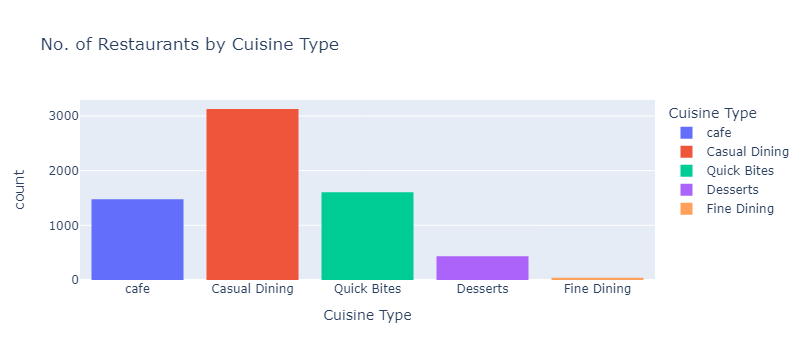

In [77]:
fig = px.histogram(zomato_df, x='Cuisine Type', color='Cuisine Type',
title= 'No. of Restaurants by Cuisine Type',
labels={'CUSINE TYPE':'Cuisine'})
fig.show()

Q2 What are the percentage of restaurants by Rating Type in Mumbai?

In [59]:
rating_type_df = zomato_df['Rating_Type'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'Rating_Type', 'Rating_Type':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,Rating_Type,COUNT OF RESTAURANTS
0,Good,2501
1,Poor,2061
2,Very Poor,1226
3,Very Good,817
4,Excellent,76


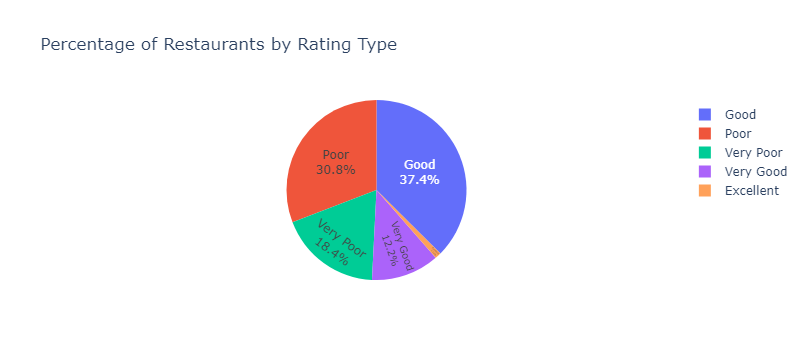

In [60]:
fig = px.pie(rating_type_df, names='Rating_Type', values='COUNT OF RESTAURANTS', color='Rating_Type',
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [79]:
seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating_Type,Cuisine Type
195,The Marina,Nungambakkam,"['Seafood', ' North Indian', ' Chinese']","['Sea Food', ' Jumbo Prawns', ' Biryani', ' Fi...",1600.0,4.8,1082,4.3,4,"['Home Delivery', 'Indoor Seating', 'Table res...",Excellent,Casual Dining
292,Alchemy Bar & Lounge,Alwarpet,"['Continental', ' Finger Food', ' Seafood', ' ...","['Cocktails', ' Fries', ' Brownie', ' Peri Per...",2000.0,4.5,432,0.0,0,"['Full Bar Available', 'Live Sports Screening'...",Excellent,Quick Bites
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964,3.4,3,"['Home Delivery', 'Full Bar Available', 'Free ...",Excellent,Fine Dining
358,The Wharf 2.0 - Radisson BLU Templebay,Mamallapuram,"['Seafood', ' Mediterranean', ' Italian', ' No...","['Sea Food', ' Jumbo Prawns', ' Pasta', ' Fish...",3000.0,4.4,517,0.0,0,"['Wheelchair Accessible', 'Full Bar Available'...",Very Good,Casual Dining
342,L'attitude 49,Grande Bay Resort,"['Singaporean', ' Thai', ' Asian', ' Chinese',...","['Sea Food', ' Fish', ' Pasta', ' Noodle', ' B...",1800.0,4.4,563,0.0,0,"['Breakfast', 'Wheelchair Accessible', 'Full B...",Very Good,Casual Dining
315,Layalee,Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...","['Fish', ' Faluda', ' Shawarma', ' Brownie', '...",700.0,4.4,586,4.1,4,"['Home Delivery', 'Table booking recommended',...",Very Good,Fine Dining
282,Bay View - Taj Fisherman's Cove Resort & Spa,Kanchipuram,"['Seafood', ' South Indian', ' Andhra', ' Kera...","['Sea Food', ' Fish Curry', ' Chips', ' Cockta...",3500.0,4.4,678,0.0,0,"['Wheelchair Accessible', 'Full Bar Available'...",Very Good,Casual Dining
96,Urban Spatula,Anna Nagar,"['Continental', ' Seafood', ' Biryani', ' Ital...","['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800.0,4.4,794,4.3,4,"['Home Delivery', 'Free Parking', 'Table booki...",Very Good,Casual Dining
14,Hotel Paramount,Kilpauk,"['North Indian', ' Chinese', ' Seafood', ' Sou...","['Biryani', ' Butter Chicken', ' Tandoori Chic...",500.0,4.3,1266,4.2,4,"['Breakfast', 'Home Delivery', 'Indoor Seating...",Very Good,Casual Dining
153,The Bayleaf,Gopalapuram,"['Mughlai', ' North Indian', ' Seafood', ' Bir...","['Rolls', ' Fish', ' Kathi Roll', ' Biryani', ...",800.0,4.3,542,4.0,4,"['Home Delivery', 'Indoor Seating', 'Wifi', 'T...",Very Good,Casual Dining


Q4) Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [81]:
# Assuming restaurants having rating above 4.5
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5]
highest_rated_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating_Type,Cuisine Type
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,0.0,0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati...",Excellent,Casual Dining
24,Eating Circles,Alwarpet,['South Indian'],"['Rose Milk', ' Neer Dosa', ' Thatte Idli', ' ...",250.0,4.7,782,4.2,4,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Excellent,Casual Dining
37,Shree Mithai,Chetpet,"['Mithai', ' Street Food', ' Fast Food']","['Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",300.0,4.6,1085,4.4,4,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Excellent,Quick Bites
50,Andhikkadai,Velachery,['South Indian'],"['Coffee', ' Sweet Kozhukattai', ' Idli', ' Po...",200.0,4.6,908,4.2,4,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Excellent,Casual Dining
57,Brownie Heaven,Royapettah,"['Bakery', ' Desserts', ' Beverages']","['Vanilla Ice Cream', ' Brownie Shake', ' Filt...",350.0,4.9,842,4.3,4,"['Home Delivery', 'Indoor Seating', 'Desserts ...",Excellent,Desserts
...,...,...,...,...,...,...,...,...,...,...,...,...
9279,Gastronomer By Double Roti,Teynampet,"['Cafe', ' American', ' Fast Food']","['Burgers', ' Fries', ' Oreo Shake', ' Healthy...",900.0,4.5,2341,4.2,4,"['Home Delivery', 'Indoor Seating', 'Wifi']",Excellent,Quick Bites
9358,Writer's Cafe,Taramani,"['Cafe', ' American']","['Hot Chocolate', ' Pizza', ' Pasta', ' Waffle...",600.0,4.5,497,4.1,4,"['Home Delivery', 'Indoor Seating', 'Table boo...",Excellent,cafe
9363,Flower Drum,Adyar,"['Chinese', ' Thai']","['Momos', ' Noodle', ' Dimsum Platter', ' Sche...",800.0,4.5,617,4.3,4,"['Home Delivery', 'Wheelchair Accessible', 'Ve...",Excellent,cafe
9367,Cream Stone,Thuraipakkam,"['Desserts', ' Ice Cream']","['Death By Chocolate', ' Chocolava', ' Tiramis...",350.0,4.5,683,4.2,4,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",Excellent,Desserts


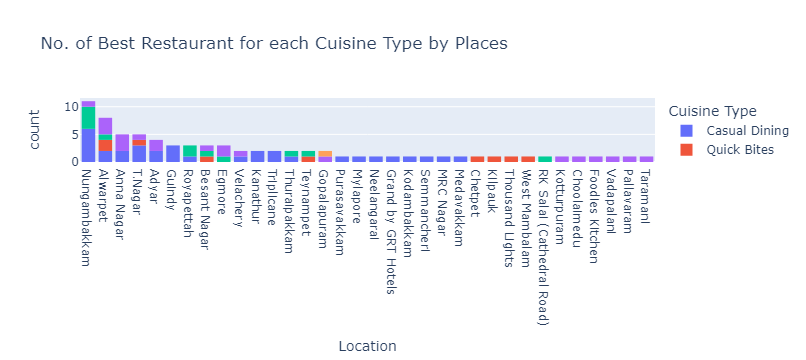

In [82]:
fig = px.histogram(highest_rated_df, x='Location', color='Cuisine Type',
title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

Q5) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [83]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine Type'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

,Location,Cuisine Type,Price for 2
0,Adyar,Casual Dining,1150.0
1,Adyar,cafe,500.0
2,Alwarpet,Casual Dining,1375.0
3,Alwarpet,Desserts,350.0
4,Alwarpet,Quick Bites,1075.0


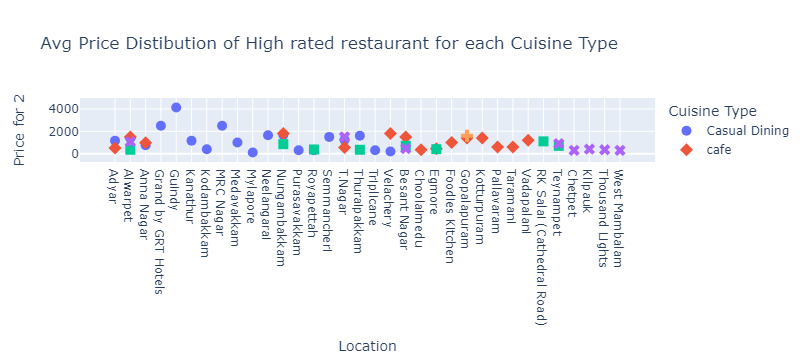

In [84]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine Type", symbol="Cuisine Type",
title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

Q7) Which areas have a large number of Chinese Restaurant Market?

In [85]:
chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')]
chinese_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating_Type,Cuisine Type
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,4,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining
5,Dine N Fun,Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567,3.8,3,"['Home Delivery', 'Indoor Seating']",Very Good,Casual Dining
8,Savoury Sea Shell,Anna Nagar,"['Arabian', ' Chinese', ' North Indian', ' Leb...","['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.2,2564,4.1,4,"['Home Delivery', 'Indoor Seating', 'Card Upon...",Very Good,Casual Dining
9,Sangeetha Veg Restaurant,T.Nagar,"['South Indian', ' North Indian', ' Chinese', ...","['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.4,1578,4.2,4,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",Very Good,Casual Dining
...,...,...,...,...,...,...,...,...,...,...,...,...
11545,Anandhi Idly Kadai,Selaiyur,"['South Indian', ' Chinese']",None,200.0,3.1,17,4.1,4,"['Breakfast', 'Home Delivery', 'Indoor Seating']",Poor,Casual Dining
11641,Hotel New Arcot Biriyani & Catering Center,GST Road,"['Chettinad', ' Chinese', ' North Indian', ' B...",None,300.0,3.7,11,0.0,0,"['Home Delivery', 'Indoor Seating']",Good,Casual Dining
11642,Valasai New Arcot Biriyani,Ramapuram,"['Biryani', ' Chinese', ' Lebanese']",None,400.0,3.3,8,0.0,0,['Indoor Seating'],Poor,cafe
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"['South Indian', ' Sandwich', ' Chinese', ' St...",None,200.0,3.2,6,3.9,3,"['Home Delivery', 'Indoor Seating']",Poor,Casual Dining


In [86]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'COUNT OF RESTAURANTS','Location' : 'Location'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.reset_index(inplace=True)

In [87]:
chinese_rest_df.head()

,Location,COUNT OF RESTAURANTS,Price for 2
0,Anna Nagar,112,567.857143
1,Porur,82,468.902439
2,T.Nagar,80,570.625000
3,Ambattur,73,408.904110
4,Perambur,66,446.212121


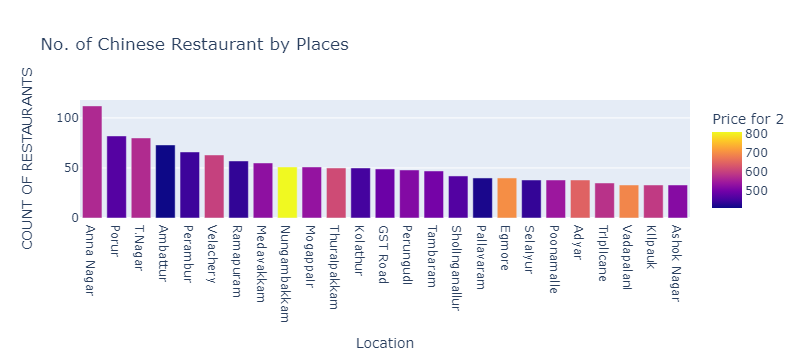

In [88]:
fig = px.bar(chinese_rest_df, x='Location', y='COUNT OF RESTAURANTS', color='Price for 2', 
             title= 'No. of Chinese Restaurant by Places')
fig.show()

Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [89]:
price_rating_df = zomato_df.groupby(['Cuisine Type', 'Dining Rating'])['Price for 2'].mean().reset_index()
price_rating_df

,Cuisine Type,Dining Rating,Price for 2
0,Casual Dining,1.9,400.000000
1,Casual Dining,2.0,354.966887
2,Casual Dining,2.1,622.222222
3,Casual Dining,2.2,614.285714
4,Casual Dining,2.3,579.411765
...,...,...,...
130,cafe,4.5,1115.000000
131,cafe,4.6,937.500000
132,cafe,4.7,1400.000000
133,cafe,4.8,350.000000


In [91]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine Type')

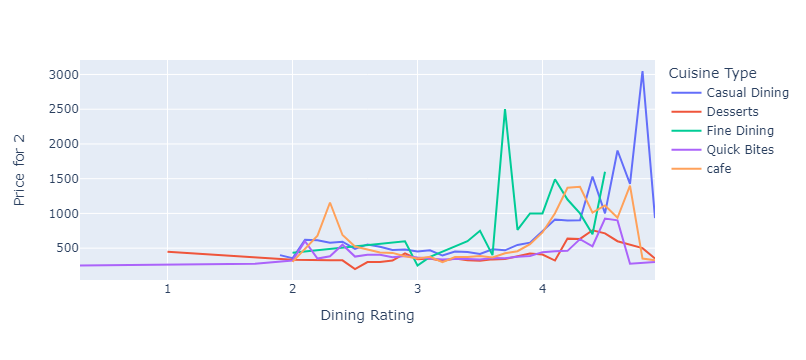

In [92]:
fig.show()

Q9) Is there a relation between Region and Price?

In [93]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,...,1500.000000
1,A Radha Hotel,1900.000000
2,Abhiramapuram,150.000000
3,Adambakkam,308.730159
4,Adyar,519.918699
...,...,...
119,Vepery,323.611111
120,Vettuvankeni,568.750000
121,Virugambakkam,377.380952
122,Washermenpet,342.622951


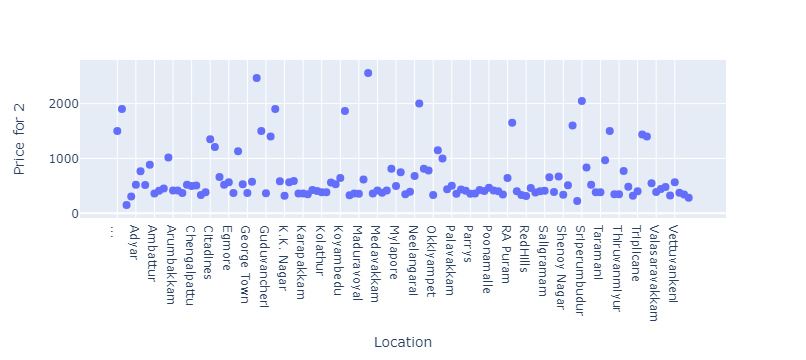

In [94]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()

Q10) Find the list of Affordable Restaurants?
The criteria for Affordable Restaurants would be:-
1) Low Price
2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000.

In [95]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [96]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine Type']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)

In [97]:
aff_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine Type
4685,Soda Hub,40.0,['Beverages'],Navallur,cafe
1448,Mamee Soup,60.0,['Healthy Food'],West Mambalam,cafe
3993,Nei Idly Sambar,100.0,['South Indian'],Kilpauk,Casual Dining
3604,Chennai Coffee,100.0,['Beverages'],Mylapore,cafe
3589,Bakers Basket - The Savera Hotel,100.0,"['Bakery', ' Desserts']",RK Salai (Cathedral Road),Desserts
...,...,...,...,...,...
1166,The Roof Top Lounge,1200.0,"['BBQ', ' North Indian', ' Continental']",Guindy,Casual Dining
371,Famous Theory,1200.0,"['North Indian', ' Chinese']",Sholinganallur,Casual Dining
17,Abid's,1200.0,"['Seafood', ' Biryani', ' Hyderabadi', ' Arabi...",Chetpet,Casual Dining
1171,Kapi Multicuisine Restaurant,1200.0,"['South Indian', ' North Indian', ' Chinese']",Coast Road (ECR),Casual Dining


In [100]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine Type','Dining Rating']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price for 2', inplace=True)
highrate_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine Type,Dining Rating
108,Rayar's Mess,100.0,['South Indian'],Mylapore,Casual Dining,4.7
178,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Quick Bites,4.7
9541,Bombay Kulfi,200.0,['Ice Cream'],Anna Nagar,cafe,4.6
320,Bombay Kulfi,200.0,['Ice Cream'],Adyar,cafe,4.9
50,Andhikkadai,200.0,['South Indian'],Velachery,Casual Dining,4.6
...,...,...,...,...,...,...
445,Dakshin - Crowne Plaza Chennai Adyar Park,2500.0,"['South Indian', ' Kerala', ' Andhra']",Alwarpet,Casual Dining,4.6
395,Southern Spice - Taj Coromandel,3000.0,['South Indian'],Nungambakkam,Casual Dining,4.7
229,Vasco's - Hilton Chennai,3400.0,"['North Indian', ' Continental', ' Asian']",Guindy,Casual Dining,4.6
443,Avartana - ITC Grand Chola,4500.0,"['South Indian', ' Chinese', ' Desserts']",Guindy,Casual Dining,4.8


In [114]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
 
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Cuisine Type_x']]
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',
'Location':'Location', 'Cuisine Type_x':'Cuisine Type'},inplace=True)

In [115]:
# Affordable Restaurants with low price and high rating
highrate_aff_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine Type
0,Rayar's Mess,100.0,['South Indian'],Mylapore,Casual Dining
1,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Quick Bites
2,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Quick Bites
3,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Quick Bites
4,Bombay Kulfi,200.0,['Ice Cream'],Anna Nagar,cafe
5,Andhikkadai,200.0,['South Indian'],Velachery,Casual Dining
6,Bombay Kulfi,200.0,['Ice Cream'],Adyar,cafe
7,Nair Mess,200.0,"['South Indian', ' Biryani']",Triplicane,Casual Dining
8,Eating Circles,250.0,['South Indian'],Alwarpet,Casual Dining
9,ID,300.0,['South Indian'],Royapettah,Casual Dining


Q10) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price
2) High Rated
3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes

In [110]:
mean_votes = zomato_df['Dining Rating Count'].mean()
mean_votes

135.36072444244874

In [111]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine Type', 'Dining Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 177]
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True)
mean_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine Type,Dining Rating Count
669,HIX Restaurant & Bar,1500.0,"['Chinese', ' Biryani', ' North Indian']",Adyar,Casual Dining,178
9053,A2B - Adyar Ananda Bhavan,300.0,"['Mithai', ' Street Food', ' Fast Food', ' Ice...",Perambur,Quick Bites,178
9563,The Noodle Theory,400.0,"['Chinese', ' Fast Food']",Adyar,Quick Bites,179
915,Aazhi - The Sea Food Mess,800.0,"['South Indian', ' Chettinad', ' Seafood']",Chromepet,Casual Dining,179
10013,Namma Veedu Vasanta Bhavan,600.0,"['Chinese', ' South Indian', ' North Indian']",Maduravoyal,Casual Dining,179
...,...,...,...,...,...,...
9026,Copper Kitchen,1000.0,"['North Indian', ' Chinese', ' Chettinad', ' S...",Porur,Casual Dining,5073
9030,Paradise Biryani,800.0,"['Biryani', ' North Indian', ' Chinese']",Perungudi,Casual Dining,5317
74,Onesta,600.0,"['Pizza', ' Italian', ' Fast Food', ' Beverage...",Semmancheri,Quick Bites,5407
9233,Barbeque Nation,1600.0,"['North Indian', ' Continental', ' Kebab', ' B...",T.Nagar,Casual Dining,5821


These are the most reliable, highest rated and affordable restaurants:-

We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
This dataframe obtained below shows the restaurants whose:

Cost is below 1250

Rating is above 4.5

Votes are above 177

In [119]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location'])


In [117]:
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Cuisine Type_x']]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price', 'Cuisine_x':'Cuisine',
'Location':'Location', 'Cuisine Type_x':'Cuisine Type'},inplace=True)

<ipython-input-117-157b66758a07>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
reliable_rest_df

,Name of Restaurant,Price,Cuisine,Location,Cuisine Type
0,Shmoozie's Hand-Crafted Ice Creams,400.0,"['Ice Cream', ' Desserts']",Egmore,Desserts
1,Kuuraku,1200.0,['Japanese'],Vadapalani,cafe
2,Bombay Kulfi,200.0,['Ice Cream'],Anna Nagar,cafe
3,New Pattukottai Kamatchi Mess,550.0,"['Tamil', ' Chettinad']",T.Nagar,cafe
4,Wok Monk,1200.0,"['Asian', ' Chinese', ' Middle Eastern']",Anna Nagar,cafe
5,Blind Ch3mistry,700.0,"['Cafe', ' Continental', ' Italian', ' Dessert...",Teynampet,Desserts
6,Writer's Cafe,600.0,"['Cafe', ' American']",Taramani,cafe
7,Bombay Kulfi,200.0,['Ice Cream'],Adyar,cafe
8,The Sandwich Shop,300.0,"['Sandwich', ' Fast Food', ' Beverages']",West Mambalam,Quick Bites
9,Fruit Shop On Greams Road,350.0,"['Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights,Quick Bites
